In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import tensorflow_hub as hub
import tensorflow as tf

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

#!pip install livelossplot
from zipfile import ZipFile

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
zip = ZipFile("/content/gdrive/MyDrive/Archive.zip")
zip.extractall()

In [5]:
traindf=pd.read_csv('train_labels.csv',dtype=str)
traindf.sort_values("img_name", inplace=True)
traindf = traindf.reset_index(drop=True)
traindf

,img_name,label
0,train_1.jpg,21
1,train_10.jpg,9
2,train_100.jpg,19
3,train_1000.jpg,1
4,train_10000.jpg,39
...,...,...
30607,train_9995.jpg,4
30608,train_9996.jpg,54
30609,train_9997.jpg,5
30610,train_9998.jpg,60


In [6]:
bad_imgs = ["train_16.jpg", "train_18.jpg", "train_43.jpg", "train_44.jpg", "train_51.jpg", "train_60.jpg", "train_68.jpg", "train_89.jpg", "train_93.jpg", "train_106.jpg", "train_107.jpg", "train_137.jpg", "train_158.jpg", "train_277.jpg", "train_333.jpg", "train_353.jpg", "train_392.jpg", "train_427.jpg", "train_436.jpg", "train_484.jpg", "train_494.jpg", "train_501.jpg", "train_541.jpg", "train_566.jpg", "train_589.jpg", "train_605.jpg", "train_655.jpg", "train_656.jpg", "train_668.jpg", "train_683.jpg", "train_728.jpg", "train_762.jpg", "train_768.jpg", "train_854.jpg", "train_868.jpg", "train_887.jpg", "train_898.jpg", "train_1012.jpg", "train_1025.jpg", "train_1073.jpg", "train_1086.jpg", "train_1088.jpg", "train_1194.jpg", "train_1238.jpg", "train_1258.jpg", "train_1274.jpg", "train_1279.jpg", "train_1308.jpg", "train_1326.jpg", "train_1388.jpg", "train_1456.jpg", "train_1462.jpg", "train_1471.jpg", "train_1476.jpg", "train_1523.jpg", "train_1531.jpg", "train_1614.jpg", "train_1674.jpg", "train_1727.jpg", "train_1735.jpg", "train_1753.jpg", "train_1830.jpg", "train_1887.jpg", "train_1998.jpg", "train_2041.jpg", "train_2032.jpg", "train_2096.jpg", "train_2097.jpg", "train_2115.jpg", "train_2170.jpg", "train_2206.jpg", "train_2215.jpg", "train_2279.jpg", "train_2330.jpg", "train_2331.jpg", "train_2345.jpg", "train_2398.jpg", "train_2401.jpg", "train_2484.jpg", "train_2492.jpg", "train_2507.jpg", "train_2566.jpg", "train_2587.jpg", "train_2626.jpg", "train_2702.jpg", "train_2721.jpg", "train_2824.jpg", "train_2889.jpg", "train_2924.jpg", "train_2987.jpg", "train_3097.jpg", "train_3130.jpg", "train_3136.jpg", "train_3137.jpg", "train_3224.jpg", "train_3286.jpg", "train_3290.jpg", "train_3312.jpg", "train_3316.jpg", "train_3337.jpg", "train_3344.jpg", "train_3396.jpg", "train_3444.jpg", "train_3450.jpg", "train_3452.jpg", "train_3550.jpg", "train_3552.jpg", "train_3588.jpg", "train_3689.jpg", "train_3734.jpg", "train_3744.jpg", "train_3749.jpg", "train_3811.jpg", "train_3849.jpg", "train_3894.jpg", "train_3903.jpg", "train_3948.jpg", "train_4020.jpg", "train_4045.jpg", "train_4082.jpg", "train_4092.jpg", "train_4099.jpg", "train_4124.jpg", "train_4139.jpg", "train_4145.jpg", "train_4264.jpg", "train_4328.jpg", "train_4421.jpg", "train_4423.jpg", "train_4442.jpg", "train_4489.jpg", "train_4607.jpg", "train_4629.jpg", "train_4650.jpg", "train_4664.jpg", "train_4668.jpg", "train_4689.jpg", "train_4711.jpg", "train_4727.jpg", "train_4755.jpg", "train_4798.jpg", "train_4878.jpg", "train_4893.jpg", "train_4944.jpg", "train_4962.jpg", "train_4966.jpg", "train_4973.jpg", "train_4997.jpg", "train_5069.jpg", "train_5087.jpg", "train_5119.jpg", "train_5173.jpg", "train_5218.jpg", "train_5240.jpg", "train_5274.jpg", "train_5248.jpg", "train_5347.jpg", "train_5350.jpg", "train_5488.jpg", "train_5566.jpg", "train_5603.jpg", "train_5610.jpg", "train_5752.jpg", "train_5995.jpg", "train_5999.jpg","train_6014.jpg", "train_6027.jpg", "train_6038.jpg", "train_6080.jpg", "train_6122.jpg", "train_6258.jpg", "train_6271.jpg", "train_6294.jpg", "train_6302.jpg", "train_6499.jpg", "train_6539.jpg", "train_6612.jpg", "train_6619.jpg", "train_6693.jpg", "train_6825.jpg", "train_6836.jpg", "train_6869.jpg", "train_6961.jpg", "train_6970.jpg", "train_6995.jpg", "train_7011.jpg", "train_7089.jpg", "train_7101.jpg", "train_7160.jpg", "train_7186.jpg", "train_7213.jpg", "train_7220.jpg", "train_7277.jpg", "train_7380.jpg", "train_7524.jpg", "train_7569.jpg", "train_7609.jpg", "train_7640.jpg", "train_7673.jpg", "train_7722.jpg", "train_7734.jpg", "train_7814.jpg", "train_7861.jpg", "train_7868.jpg", "train_7888.jpg", "train_7934.jpg", "train_8014.jpg", "train_8121.jpg", "train_8224.jpg", "train_8268.jpg", "train_8331.jpg", "train_8423.jpg", "train_8454.jpg", "train_8464.jpg", "train_8561.jpg", "train_8598.jpg", "train_8617.jpg", "train_8706.jpg", "train_8715.jpg", "train_8734.jpg", "train_8750.jpg", "train_8805.jpg", "train_8952.jpg", "train_8955.jpg", "train_8998.jpg", "train_9107.jpg", "train_9195.jpg", "train_9205.jpg", "train_9226.jpg", "train_9298.jpg", "train_9305.jpg", "train_9324.jpg", "train_9345.jpg", "train_9400.jpg", "train_9409.jpg", "train_9488.jpg", "train_9504.jpg", "train_9593.jpg", "train_9597.jpg", "train_9650.jpg", "train_9686.jpg", "train_9706.jpg", "train_9743.jpg", "train_9750.jpg", "train_9754.jpg", "train_9789.jpg", "train_9822.jpg", "train_9854.jpg", "train_9897.jpg", "train_9947.jpg", "train_10004.jpg", "train_10023.jpg", "train_10027.jpg", "train_10030.jpg", "train_10031.jpg", "train_10035.jpg", "train_10040.jpg", "train_10042.jpg", "train_10046.jpg", "train_10056.jpg", "train_10060.jpg", "train_10067.jpg", "train_10129.jpg", "train_10134.jpg", "train_10144.jpg", "train_10147.jpg", "train_10204.jpg", "train_10266.jpg", "train_10274.jpg", "train_10292.jpg", "train_10335.jpg", "train_10344.jpg", "train_10355.jpg", "train_10358.jpg", "train_10383.jpg", "train_10399.jpg", "train_10400.jpg", "train_10419.jpg", "train_10446.jpg", "train_10455.jpg", "train_10457.jpg", "train_10654.jpg", "train_10655.jpg", "train_10710.jpg", "train_10775.jpg", "train_10807.jpg", "train_10830.jpg", "train_10870.jpg", "train_10873.jpg", "train_10884.jpg", "train_10886.jpg", "train_10991.jpg", "train_11147.jpg", "train_11190.jpg", "train_11194.jpg", "train_11212.jpg", "train_11361.jpg", "train_11413.jpg", "train_11438.jpg", "train_11470.jpg", "train_11495.jpg", "train_11592.jpg", "train_11598.jpg", "train_11608.jpg", "train_11619.jpg", "train_11641.jpg", "train_11683.jpg", "train_11765.jpg", "train_11959.jpg", "train_11983.jpg", "train_12001.jpg", "train_12026.jpg", "train_12092.jpg", "train_12133.jpg", "train_12155.jpg", "train_12175.jpg", "train_12238.jpg", "train_12336.jpg", "train_12367.jpg", "train_12474.jpg", "train_12488.jpg", "train_12493.jpg", "train_12524.jpg", "train_12608.jpg", "train_12680.jpg", "train_12690.jpg", "train_12735.jpg", "train_12735.jpg", "train_12766.jpg", "train_12810.jpg", "train_12824.jpg", "train_12837.jpg", "train_12890.jpg", "train_12932.jpg", "train_12953.jpg", "train_12969.jpg", "train_12991.jpg", "train_13038.jpg", "train_13127.jpg", "train_13280.jpg", "train_13299.jpg", "train_13318.jpg", "train_13321.jpg", "train_13343.jpg", "train_13396.jpg", "train_13508.jpg", "train_13640.jpg", "train_13756.jpg", "train_13770.jpg", "train_13783.jpg", "train_13803.jpg", "train_13992.jpg", "train_14046.jpg", "train_14089.jpg", "train_14136.jpg", "train_14144.jpg", "train_14247.jpg", "train_14340.jpg", "train_14547.jpg", "train_14556.jpg", "train_14713.jpg", "train_14722.jpg", "train_14856.jpg", "train_14868.jpg", "train_14892.jpg", "train_15005.jpg", "train_15045.jpg", "train_15073.jpg", "train_15214.jpg", "train_15242.jpg", "train_15296.jpg", "train_15316.jpg", "train_15518.jpg", "train_15546.jpg", "train_15619.jpg", "train_15666.jpg", "train_15868.jpg", "train_15944.jpg", "train_16153.jpg", "train_16175.jpg", "train_16215.jpg", "train_16271.jpg", "train_16303.jpg", "train_16413.jpg", "train_16593.jpg", "train_16709.jpg", "train_16747.jpg", "train_16909.jpg", "train_16971.jpg", "train_16979.jpg", "train_17027.jpg", "train_17291.jpg", "train_17304.jpg", "train_17315.jpg", "train_17351.jpg", "train_17371.jpg", "train_17398.jpg", "train_17447.jpg", "train_17463.jpg", "train_17501.jpg", "train_17507.jpg", "train_17524.jpg", "train_17527.jpg", "train_17575.jpg", "train_17581.jpg", "train_17674.jpg", "train_17712.jpg", "train_17833.jpg", "train_17856.jpg", "train_17937.jpg", "train_17950.jpg", "train_18161.jpg", "train_18168.jpg", "train_18175.jpg", "train_18184.jpg", "train_18214.jpg", "train_18476.jpg", "train_18564.jpg", "train_18562.jpg", "train_18597.jpg", "train_18621.jpg", "train_18744.jpg", "train_18763.jpg", "train_18826.jpg", "train_19018.jpg", "train_19150.jpg", "train_19315.jpg", "train_19362.jpg", "train_19435.jpg", "train_19482.jpg", "train_19511.jpg", "train_19568.jpg", "train_19574.jpg", "train_19594.jpg", "train_19601.jpg", "train_19676.jpg", "train_19696.jpg", "train_19794.jpg", "train_19956.jpg", "train_19982.jpg", "train_19994.jpg", "train_20016.jpg"]
print(len(bad_imgs))

442


In [8]:
cleaned_data = traindf[~traindf['img_name'].isin(bad_imgs)]

In [9]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input
#preprocess_input = tf.keras.applications.resnet.preprocess_input
#preprocess_input = tf.keras.applications.xception.preprocess_input

In [10]:
IMG_SHAPE = (224, 224)
IMG_SIZE= 100

In [11]:
# link train labels to images and resize them
datagen=ImageDataGenerator(rescale=1./255.,
                           rotation_range=20,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest',
                           validation_split = 0.3,
                           preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(rescale=1 / 255.0, preprocessing_function = preprocess_input)

valid_generator = datagen.flow_from_dataframe(dataframe=cleaned_data, 
                                            directory="train_set/train_set/train_set", 
                                            x_col="img_name", 
                                            y_col="label", 
                                            subset="validation", 
                                            batch_size=64,  
                                            shuffle=True, 
                                            class_mode="categorical", 
                                            target_size=IMG_SHAPE
)

# training set and validation set + resize images can be more with adding extra options
train_generator = datagen.flow_from_dataframe(dataframe=cleaned_data, 
                                            directory="train_set/train_set/train_set", 
                                            x_col="img_name", 
                                            y_col="label", 
                                            subset="training", 
                                            batch_size=64,  
                                            shuffle=True, 
                                            class_mode="categorical", 
                                            target_size=IMG_SHAPE
)

Found 9051 validated image filenames belonging to 80 classes.
Found 21120 validated image filenames belonging to 80 classes.


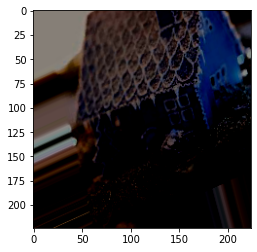

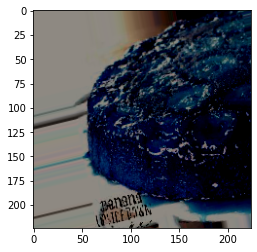

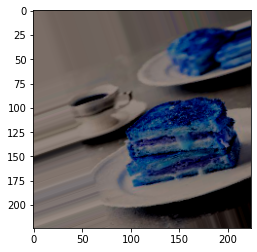

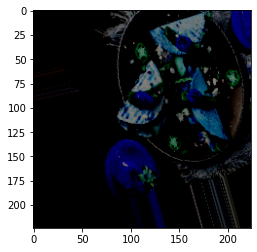

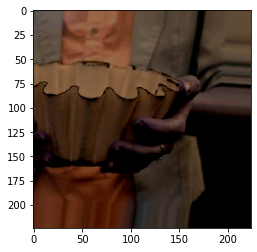

In [12]:
for i in range(5):
  im, lbl = valid_generator[i]
  plt.imshow(im[0])
  plt.show()

In [35]:
# load keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D


from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
#from livelossplot import PlotLossesKeras

# Scratch

In [ ]:
# make model 
model = Sequential()

# AlexNet
model.add(Conv2D(48,kernel_size=(4,4),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=(5,5),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(192,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(80, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 47, 47, 48)        2352      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 48)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 19, 19, 128)       153728    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 192)         221376    
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)        

In [ ]:
model = Sequential()

model.add(Conv2D(48,kernel_size=(4,4),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3))))

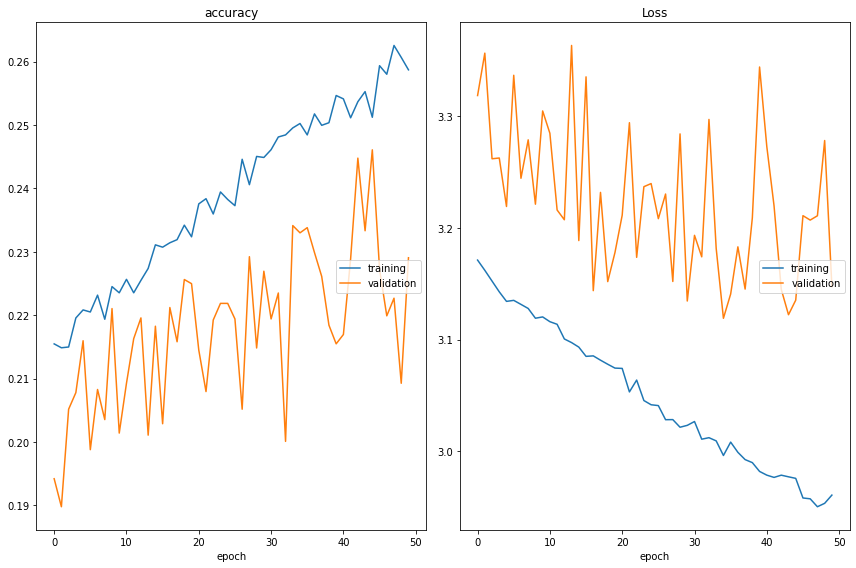

accuracy
	training         	 (min:    0.215, max:    0.263, cur:    0.259)
	validation       	 (min:    0.190, max:    0.246, cur:    0.229)
Loss
	training         	 (min:    2.950, max:    3.171, cur:    2.961)
	validation       	 (min:    3.119, max:    3.363, cur:    3.148)
CPU times: user 1h 11min 49s, sys: 2min 20s, total: 1h 14min 10s
Wall time: 1h 11min 32s


In [ ]:
%%time

steps_per_epoch = train_generator.samples // 32
val_steps = valid_generator.samples // 32

n_epochs = 50

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.load_weights('drive/MyDrive/Colab Notebooks/AlexNet.weights.best.hdf5')

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5',
                               verbose=1,
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(train_generator,
                    epochs=n_epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_generator,
                    validation_steps=val_steps,
                    callbacks=[checkpointer, PlotLossesKeras()],
                    verbose=False)

# ResNet_v2

In [ ]:
IMG_SHAPE = IMG_SHAPE + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
inputs = tf.keras.Input(shape=(256, 256, 3))
x = preprocess_input(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalMaxPooling2D()(x.output)
x = tf.keras.layers.Dropout(0.2)(x)
#x = flattenLayer(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(80, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

steps_per_epoch = train_generator.samples // 32
val_steps = valid_generator.samples // 32

n_epochs = 20

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

model.summary()

AttributeError: ignored

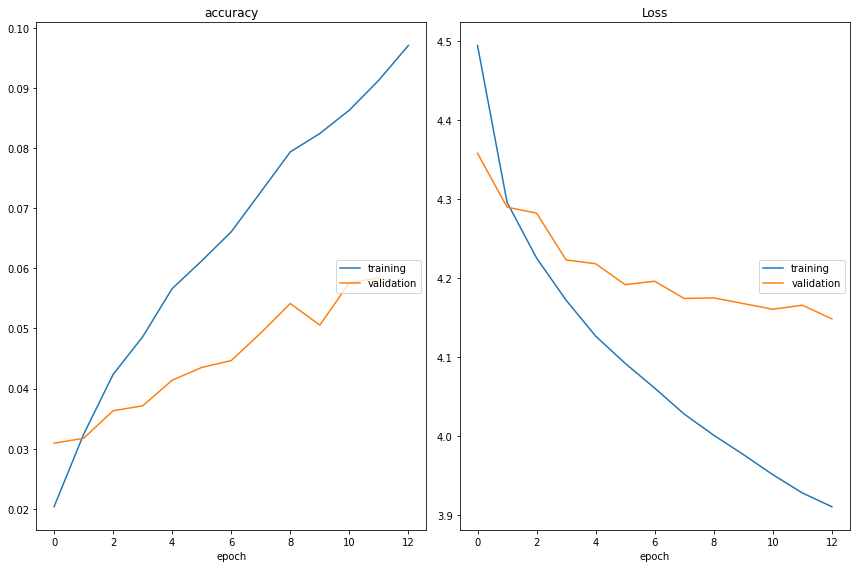

accuracy
	training         	 (min:    0.020, max:    0.097, cur:    0.097)
	validation       	 (min:    0.031, max:    0.058, cur:    0.057)
Loss
	training         	 (min:    3.910, max:    4.494, cur:    3.910)
	validation       	 (min:    4.148, max:    4.358, cur:    4.148)


KeyboardInterrupt: ignored

In [ ]:
#model.load_weights('img_model.weights.best.hdf5')

# Actual fitting of the model
history = model.fit(train_generator,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_generator,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer])

# DenseNet


In [ ]:
base_model = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

# # make final part self with 80 categories
final_part = Flatten(name="flatten")(base_model.output)
output_layer = Dense(80, activation='softmax')(final_part)

model = Model(inputs=base_model.input, outputs=output_layer)

model.summary()

# VGG16


In [36]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [37]:
# Freezes layers
for layer in base_model.layers:
    layer.trainable = False

# for layer in base_model.layers[17:19]:
#     layer.trainable = True
    
for layer in base_model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [38]:
base_model.layers[-1].trainable=True
base_model.layers[-2].trainable=True
base_model.layers[-3].trainable=True
base_model.layers[-4].trainable=True

In [39]:
final_part = base_model.output
final_part = GlobalAveragePooling2D()(final_part)
final_part = Dropout(0.4)(final_part)

final_part = Flatten(name="flatten")(final_part)
# final_part = Dense(4096, activation='relu')(final_part)

# final_part = Dense(1072, activation='relu')(final_part)
# final_part = Dropout(0.2)(final_part)
#final_part = Dense(512, activation='relu')(final_part)
#final_part = Dense(256, activation='relu')(final_part)
output_layer = Dense(80, activation='softmax')(final_part)

model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [40]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

checkpoint = ModelCheckpoint(filepath='best_model_2davg_pooling.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

n_epochs = 10

steps_per_epoch = train_generator.samples // 64
val_steps = valid_generator.samples // 64

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
%%time
history_1 = model.fit(train_generator, 
                    batch_size=64, 
                    epochs=n_epochs,
                    validation_data=valid_generator, 
                    callbacks=[checkpoint, 
                               #early_stop,
                               #PlotLossesKeras()
#                              LearningRateScheduler(learning_rate_decay, verbose=1)
                              ],
                    verbose=1, 
                    shuffle=True)

Epoch 1/10
330/330 [==============================] - ETA: 0s - loss: 3.9021 - accuracy: 0.1031
Epoch 1: val_loss improved from inf to 3.14066, saving model to best_model_2davg_pooling.weights.best.hdf5
330/330 [==============================] - 416s 1s/step - loss: 3.9021 - accuracy: 0.1031 - val_loss: 3.1407 - val_accuracy: 0.2568
Epoch 2/10
330/330 [==============================] - ETA: 0s - loss: 3.0379 - accuracy: 0.2650
Epoch 2: val_loss improved from 3.14066 to 2.60372, saving model to best_model_2davg_pooling.weights.best.hdf5
330/330 [==============================] - 401s 1s/step - loss: 3.0379 - accuracy: 0.2650 - val_loss: 2.6037 - val_accuracy: 0.3654
Epoch 3/10
330/330 [==============================] - ETA: 0s - loss: 2.6508 - accuracy: 0.3495
Epoch 3: val_loss improved from 2.60372 to 2.35971, saving model to best_model_2davg_pooling.weights.best.hdf5
330/330 [==============================] - 401s 1s/step - loss: 2.6508 - accuracy: 0.3495 - val_loss: 2.3597 - val_accu

In [ ]:
# unfreezes layers
for layer in base_model.layers:
    layer.trainable = False

# for layer in base_model.layers[17:19]:
#     layer.trainable = True
    
for layer in base_model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


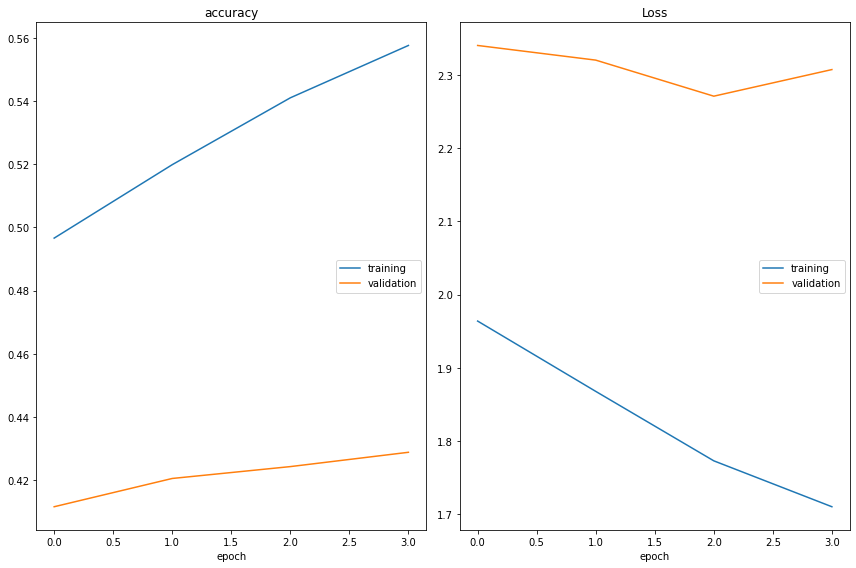

accuracy
	training         	 (min:    0.497, max:    0.558, cur:    0.558)
	validation       	 (min:    0.412, max:    0.429, cur:    0.429)
Loss
	training         	 (min:    1.710, max:    1.964, cur:    1.710)
	validation       	 (min:    2.271, max:    2.340, cur:    2.307)
330/330 [==============================] - 381s 1s/step - loss: 1.7104 - accuracy: 0.5576 - val_loss: 2.3074 - val_accuracy: 0.4288
Epoch 5/10
115/330 [=========>....................] - ETA: 2:55 - loss: 1.5968 - accuracy: 0.5851

In [ ]:
%%time
n_epochs = 10

history_1 = model.fit(train_generator, 
                    batch_size=64, 
                    epochs=n_epochs,
                    validation_data=valid_generator, 
                    callbacks=[checkpoint, 
                               #early_stop,
                               PlotLossesKeras()
#                              LearningRateScheduler(learning_rate_decay, verbose=1)
                              ],
                    verbose=1, 
                    shuffle=True)

In [ ]:
model.save_weights('gdrive/MyDrive/best_weights_Epoch14.weights.best.hdf5')

In [ ]:
model.evaluate(valid_generator)

142/142 [==============================] - 115s 811ms/step - loss: 2.3853 - accuracy: 0.4973


KeyboardInterrupt: ignored

In [ ]:
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
dftest = pd.read_csv("sample.csv")
dftest

,img_name,label
0,test_1.jpg,1
1,test_2.jpg,1
2,test_3.jpg,1
3,test_4.jpg,1
4,test_5.jpg,1
...,...,...
7648,test_7649.jpg,1
7649,test_7650.jpg,1
7650,test_7651.jpg,1
7651,test_7652.jpg,1


In [ ]:
test_generator = ImageDataGenerator(rescale=1 / 255.0, preprocessing_function = preprocess_input)

# VGG16
# make test images from map
test = test_generator.flow_from_dataframe(
    dataframe=dftest,
    directory="test_set/test_set/test_set", 
    x_col="img_name",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 7653 validated image filenames.


In [ ]:
#model.load_weights('/content/gdrive/MyDrive/Colab Notebooks/best_model_epoch7.weights.best.hdf5')

In [ ]:
model_predictions = model.predict(test)

 686/7653 [=>............................] - ETA: 1:04

KeyboardInterrupt: ignored

In [ ]:
model_predictions_classes = np.argmax(model_predictions, axis=1)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((values,keys) for keys,values in labels.items())
predictions = [labels[keys] for keys in model_predictions_classes]

In [ ]:
filenames=test.filenames
results=pd.DataFrame({"img_name":filenames,
                      "label":predictions})
results.to_csv("predictions.csv",index=False)